# Data cleanining
## Imports

In [184]:
# Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data in DataFrame

In [185]:
# Read data
data = pd.read_csv("Immoweb_scraping_result.csv")

## Look at data

In [109]:
# First look
data.head()

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
0,20320744,1150,APARTMENT,APARTMENT,575000,residential_sale,3,160.0,1.0,0.0,...,1.0,40.0,1.0,290.0,290.0,NaN,NaN,0.0,GOOD,single
1,20317718,9000,APARTMENT,APARTMENT,390000,residential_sale,3,96.0,1.0,0.0,...,1.0,29.0,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,compound
2,20315842,9051,APARTMENT,APARTMENT,260000,residential_sale,1,76.0,1.0,0.0,...,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
3,20315799,9051,APARTMENT,APARTMENT,325000,residential_sale,1,81.0,1.0,0.0,...,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
4,20315776,9051,APARTMENT,APARTMENT,365000,residential_sale,3,101.0,1.0,0.0,...,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound


In [186]:
# Number rows and columns
data.shape

(15516, 21)

## Find and handle duplicates

In [187]:
# Based on ImmoWeb code
duplicates_code = data.duplicated(['id'], keep= False)
data[duplicates_code].sort_values(by= 'id')

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
499,9380777,8430,APARTMENT,APARTMENT,311500,residential_sale,2,79.0,NaN,NaN,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
1402,9380777,8430,APARTMENT,APARTMENT,311500,residential_sale,2,79.0,NaN,NaN,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
13036,9380780,8430,APARTMENT,APARTMENT,297000,residential_sale,2,82.0,NaN,NaN,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
12133,9380780,8430,APARTMENT,APARTMENT,297000,residential_sale,2,82.0,NaN,NaN,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
5282,9380781,8430,APARTMENT,APARTMENT,321500,residential_sale,2,79.0,NaN,NaN,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,20319797,9100,HOUSE,HOUSE,430000,residential_sale,5,188.0,1.0,NaN,...,1.0,NaN,1.0,120.0,120.0,375.0,NaN,NaN,NaN,single
6083,20320128,8310,HOUSE,VILLA,245000,residential_sale,3,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,301.0,NaN,NaN,TO_RENOVATE,single
13840,20320128,8310,HOUSE,VILLA,245000,residential_sale,3,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,301.0,NaN,NaN,TO_RENOVATE,single
9962,20320926,8200,HOUSE,EXCEPTIONAL_PROPERTY,1935000,residential_sale,6,718.0,1.0,0.0,...,1.0,NaN,NaN,NaN,NaN,5085.0,4.0,1.0,AS_NEW,single


In [188]:
# 3096 rows.... drop complete duplicates
data.drop_duplicates(inplace= True)

In [189]:
# dropped 1551 rows
data.shape

(13965, 21)

## Missing data

In [ ]:
# Finding rows with number of NaN
data[data.isna().sum(axis=1) == 9]

# 16 rows 12 NaN
# 246 rows 11
# 345 10
# 1152 9


,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
17,20313211,1070,APARTMENT,KOT,132350,residential_sale,0,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,AS_NEW,compound
18,20313093,1070,APARTMENT,KOT,132350,residential_sale,0,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,AS_NEW,compound
19,20313081,1070,APARTMENT,KOT,132350,residential_sale,0,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,AS_NEW,compound
20,20313169,1070,APARTMENT,KOT,132350,residential_sale,0,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,AS_NEW,compound
21,20313171,1070,APARTMENT,KOT,132350,residential_sale,0,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,AS_NEW,compound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15402,20134491,8660,APARTMENT,PENTHOUSE,795000,residential_sale,3,155.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,single
15415,20308471,8800,HOUSE,HOUSE,639000,residential_sale,3,224.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,420.0,3.0,NaN,NaN,single
15470,20270287,3000,APARTMENT,APARTMENT,215000,residential_sale,1,22.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,single
15488,20162961,3530,HOUSE,HOUSE,299000,residential_sale,3,190.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2108.0,NaN,NaN,TO_RENOVATE,single


## Data type constraints

In [130]:
# Check data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13965 entries, 0 to 15515
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13965 non-null  int64  
 1   Locality                          13965 non-null  object 
 2   Type of property                  13965 non-null  object 
 3   Subtype of property               13965 non-null  object 
 4   Price                             13965 non-null  float64
 5   Type of sale                      13965 non-null  object 
 6   Number of rooms                   13965 non-null  int64  
 7   Living Area                       13754 non-null  float64
 8   Fully equipped kitchen            13965 non-null  int64  
 9   Furnished                         13965 non-null  object 
 10  Fireplace                         13965 non-null  int64  
 11  Terrace                           13965 non-null  int64  
 12  Terrace a

In [129]:
# Fix data types

data['Locality'] = data['Locality'].astype('str')
data['Fully equipped kitchen'] = data['Fully equipped kitchen'].fillna(-1).astype('int64')
#data['Fully equipped kitchen'] = data['Fully equipped kitchen'].replace(-1, np.nan)
data['Price'] = data['Price'].astype('float')
data['Furnished'] = data['Furnished'].fillna(-1).astype('str')
#data['Furnished'] = data['Furnished'].replace(-1, np.nan)
data['Terrace'] = data['Terrace'].fillna(-1).astype('int64')
#data['Terrace'] = data['Terrace'].replace(-1, np.nan)
data['Garden'] = data['Garden'].fillna(-1).astype('int64')
#data['Garden'] = data['Garden'].replace(-1, np.nan)
data['Number of facades'] = data['Number of facades'].fillna(-1).astype('int64')
#data['Number of facades'] = data['Number of facades'].replace(-1, np.nan)
data['Swimming pool'] = data['Swimming pool'].fillna(-1).astype('int64')
#data['Swimming pool'] = data['Swimming pool'].replace(-1, np.nan)



## Verifying categorical values - value consistency
### Postal code

In [ ]:


data[data['Locality'].apply(lambda x: len(x) != 4)] # All postalcodes are 4 digits long


,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing


### Type of property
All properties either APARTMENT or HOUSE


In [131]:
data['Type of property'].value_counts()


Type of property
APARTMENT    9564
HOUSE        4401
Name: count, dtype: int64

### Subtype of property
Many different categories and strong group imbalance
BUT subtype - so exclude from analysis
- reassign those can reassign
- drop really low categories

In [132]:
data['Subtype of property'].value_counts()

Subtype of property
APARTMENT               7610
HOUSE                   3269
GROUND_FLOOR             507
PENTHOUSE                436
FLAT_STUDIO              422
VILLA                    416
DUPLEX                   264
KOT                      212
MIXED_USE_BUILDING       195
APARTMENT_BLOCK          171
EXCEPTIONAL_PROPERTY      82
MANSION                   77
TOWN_HOUSE                58
COUNTRY_COTTAGE           54
SERVICE_FLAT              48
BUNGALOW                  47
LOFT                      44
TRIPLEX                   21
FARMHOUSE                 18
MANOR_HOUSE                5
CHALET                     5
CASTLE                     3
OTHER_PROPERTY             1
Name: count, dtype: int64

### Type of sale
All are of same type - residential_sale
-> Drop column

In [133]:
data['Type of sale'].value_counts()

Type of sale
residential_sale    13965
Name: count, dtype: int64

### Fully equipped kitchen
Two values, ok

In [134]:
data['Fully equipped kitchen'].value_counts()

Fully equipped kitchen
 1    9849
-1    4116
Name: count, dtype: int64

### Compound listing
All of correct values, single or compound

In [135]:
data['Compound Listing'].value_counts()

Compound Listing
single      8009
compound    5956
Name: count, dtype: int64

### State of the building

Strong group imbalance
- GOOD/AS_NEW
- TO_RENOVATE/TO_BE_DONE_UP/JUST_RENOVATED/TO_RESTORE

Reassign NaN?
Reassign values? TO_RENOVATE/TO_BE_DONE_UP/TO_RESTORE and AS_NEW/JUST_RENOVATED

In [136]:
data['State of the building'].value_counts()

State of the building
GOOD              4441
AS_NEW            3990
TO_RENOVATE        882
TO_BE_DONE_UP      751
JUST_RENOVATED     670
TO_RESTORE          31
Name: count, dtype: int64

### Furnished
2 values or Nan - ok

In [153]:
data['Furnished'].value_counts()

Furnished
-1.0    7396
0.0     6125
1.0      444
Name: count, dtype: int64

### Fireplace
Two values - ok

In [154]:
data['Fireplace'].value_counts()

Fireplace
0    13565
1      400
Name: count, dtype: int64

### Terrace
All 1 or NaN - ok

In [155]:
data['Terrace'].value_counts()

Terrace
 1    10802
-1     3163
Name: count, dtype: int64

### Garden
all -1 or NaN - ok

In [156]:
data['Garden'].value_counts()

Garden
-1    11225
 1     2740
Name: count, dtype: int64

### Swimming pool
Two values or NaN - ok

In [157]:
data['Swimming pool'].value_counts()

Swimming pool
-1    8797
 0    4914
 1     254
Name: count, dtype: int64

## Verifying numerical data

In [137]:
data[['Price', 'Number of rooms', 'Living Area', 'Terrace area', 'Garden area', 'Surface of the land', 'Surface area of the plot of land', 'Number of facades']].describe()

,Price,Number of rooms,Living Area,Terrace area,Garden area,Surface of the land,Surface area of the plot of land,Number of facades
count,1.396500e+04,13965.000000,13754.000000,8251.000000,2740.000000,2740.000000,4401.000000,13965.000000
mean,4.449066e+05,2.475188,137.628181,21.728154,512.576642,512.576642,1088.610543,1.418475
std,3.917057e+05,1.378069,117.152350,52.015656,1285.160013,1285.160013,3166.512802,1.893514
min,2.750000e+04,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,-1.000000
25%,2.602500e+05,2.000000,85.000000,8.000000,52.000000,52.000000,180.000000,-1.000000
50%,3.490000e+05,2.000000,107.000000,13.000000,147.000000,147.000000,400.000000,2.000000
75%,4.850000e+05,3.000000,157.000000,24.000000,451.250000,451.250000,900.000000,3.000000
max,6.495000e+06,25.000000,4829.000000,3749.000000,18131.000000,18131.000000,64300.000000,6.000000


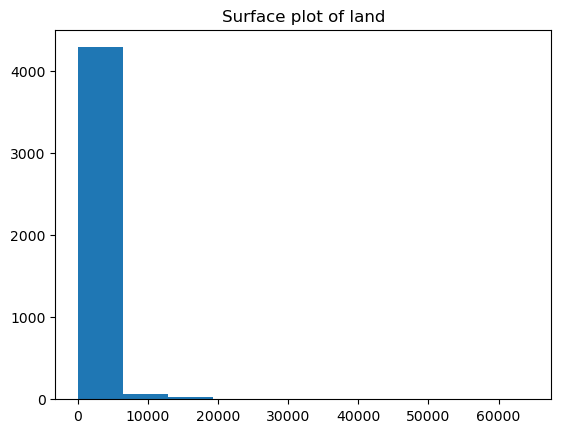

In [ ]:
plt.hist(data['Surface area of the plot of land'])
plt.title('Surface plot of land')
plt.show()
# Severely skewed distribution ; remove > 10000 (68 rows)?

In [139]:
data[data['Surface area of the plot of land'] >= 10000]

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
329,20287191,9700,HOUSE,COUNTRY_COTTAGE,345000.0,residential_sale,3,302.0,1,0.0,...,1,NaN,-1,NaN,NaN,34690.0,4,0,TO_RENOVATE,single
706,20290335,3450,HOUSE,HOUSE,553000.0,residential_sale,4,209.0,1,0.0,...,1,NaN,-1,NaN,NaN,23503.0,3,0,GOOD,single
720,20285258,8610,HOUSE,FARMHOUSE,649000.0,residential_sale,5,314.0,1,0.0,...,-1,NaN,-1,NaN,NaN,23912.0,-1,-1,TO_RENOVATE,single
831,20286621,8740,HOUSE,VILLA,1895000.0,residential_sale,8,334.0,-1,-1.0,...,1,NaN,-1,NaN,NaN,18262.0,4,-1,GOOD,single
973,20262952,8750,HOUSE,COUNTRY_COTTAGE,1775000.0,residential_sale,7,696.0,-1,-1.0,...,1,NaN,-1,NaN,NaN,19664.0,4,-1,AS_NEW,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14612,20311372,8520,HOUSE,COUNTRY_COTTAGE,735000.0,residential_sale,4,250.0,1,-1.0,...,1,NaN,-1,NaN,NaN,12518.0,4,-1,TO_RENOVATE,single
15285,20274134,3800,HOUSE,COUNTRY_COTTAGE,1298000.0,residential_sale,5,453.0,-1,-1.0,...,-1,NaN,-1,NaN,NaN,19223.0,3,1,AS_NEW,single
15297,20304356,1473,HOUSE,EXCEPTIONAL_PROPERTY,950000.0,residential_sale,7,382.0,-1,-1.0,...,-1,NaN,-1,NaN,NaN,15400.0,4,1,TO_BE_DONE_UP,single
15432,20303201,4870,HOUSE,APARTMENT_BLOCK,1245000.0,residential_sale,12,814.0,1,0.0,...,1,NaN,-1,NaN,NaN,28600.0,4,0,GOOD,single


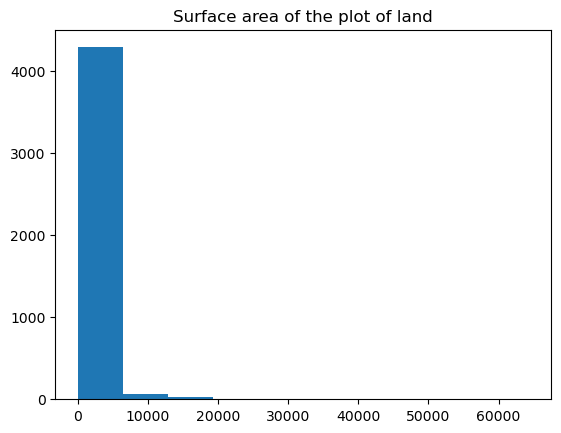

In [ ]:
plt.hist(data['Surface area of the plot of land'])
plt.title('Surface area of the plot of land')
plt.show()

# Drop >= 10_000 (68 rows)

In [160]:
data[data['Surface area of the plot of land'] >= 10_000]

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
329,20287191,9700,HOUSE,COUNTRY_COTTAGE,345000.0,residential_sale,3,302.0,1,0.0,...,1,NaN,-1,NaN,NaN,34690.0,4,0,TO_RENOVATE,single
706,20290335,3450,HOUSE,HOUSE,553000.0,residential_sale,4,209.0,1,0.0,...,1,NaN,-1,NaN,NaN,23503.0,3,0,GOOD,single
720,20285258,8610,HOUSE,FARMHOUSE,649000.0,residential_sale,5,314.0,1,0.0,...,-1,NaN,-1,NaN,NaN,23912.0,-1,-1,TO_RENOVATE,single
831,20286621,8740,HOUSE,VILLA,1895000.0,residential_sale,8,334.0,-1,-1.0,...,1,NaN,-1,NaN,NaN,18262.0,4,-1,GOOD,single
973,20262952,8750,HOUSE,COUNTRY_COTTAGE,1775000.0,residential_sale,7,696.0,-1,-1.0,...,1,NaN,-1,NaN,NaN,19664.0,4,-1,AS_NEW,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14612,20311372,8520,HOUSE,COUNTRY_COTTAGE,735000.0,residential_sale,4,250.0,1,-1.0,...,1,NaN,-1,NaN,NaN,12518.0,4,-1,TO_RENOVATE,single
15285,20274134,3800,HOUSE,COUNTRY_COTTAGE,1298000.0,residential_sale,5,453.0,-1,-1.0,...,-1,NaN,-1,NaN,NaN,19223.0,3,1,AS_NEW,single
15297,20304356,1473,HOUSE,EXCEPTIONAL_PROPERTY,950000.0,residential_sale,7,382.0,-1,-1.0,...,-1,NaN,-1,NaN,NaN,15400.0,4,1,TO_BE_DONE_UP,single
15432,20303201,4870,HOUSE,APARTMENT_BLOCK,1245000.0,residential_sale,12,814.0,1,0.0,...,1,NaN,-1,NaN,NaN,28600.0,4,0,GOOD,single


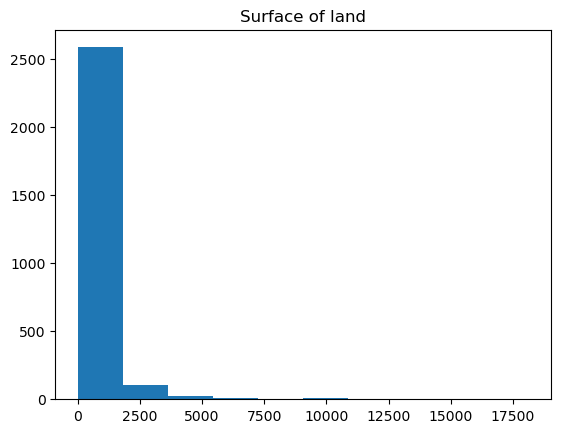

In [ ]:
plt.hist(data['Surface of the land'])
plt.title('Surface of land')
plt.show()

# Severely skewed dist - remove >= 2500 (93 rows)?

In [141]:
data[data['Surface of the land'] >= 2500] # outlier but sound

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
93,20318858,1350,HOUSE,HOUSE,769000.0,residential_sale,5,222.0,1,0.0,...,1,20.0,1,9310.0,9310.0,9592.0,4,0,AS_NEW,single
728,10938778,1180,HOUSE,VILLA,1800000.0,residential_sale,4,219.0,1,0.0,...,1,150.0,1,5000.0,5000.0,5500.0,4,0,TO_RENOVATE,single
766,20148041,4000,HOUSE,VILLA,595000.0,residential_sale,7,455.0,1,-1.0,...,1,28.0,1,3100.0,3100.0,3333.0,4,-1,TO_RENOVATE,single
811,20237920,4900,HOUSE,HOUSE,595000.0,residential_sale,4,214.0,1,0.0,...,1,18.0,1,2908.0,2908.0,3094.0,4,1,GOOD,single
882,20210234,2930,HOUSE,HOUSE,1980000.0,residential_sale,5,689.0,1,-1.0,...,-1,NaN,1,3149.0,3149.0,3149.0,-1,1,GOOD,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14720,20253603,3220,HOUSE,HOUSE,370000.0,residential_sale,5,195.0,1,-1.0,...,1,20.0,1,2500.0,2500.0,3133.0,4,-1,TO_RENOVATE,single
14986,20063113,5380,APARTMENT,APARTMENT,399000.0,residential_sale,3,115.0,-1,-1.0,...,1,55.0,1,6803.0,6803.0,NaN,-1,-1,GOOD,compound
15138,20311635,1400,APARTMENT,APARTMENT,159000.0,residential_sale,2,75.0,1,0.0,...,1,13.0,1,10000.0,10000.0,NaN,4,0,GOOD,single
15335,11211770,3090,HOUSE,VILLA,1195000.0,residential_sale,5,349.0,1,0.0,...,1,130.0,1,5000.0,5000.0,6162.0,4,0,GOOD,single


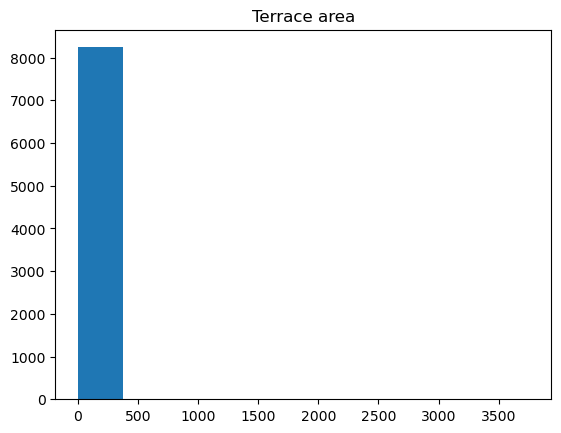

In [ ]:
plt.hist(data['Terrace area'])
plt.title('Terrace area')
plt.show()

# Drop >= 250 ? (19 rows)

In [167]:
data[data['Terrace area'] >= 250]

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
2090,20301177,4140,HOUSE,HOUSE,899000.0,residential_sale,13,778.0,1,0.0,...,1,443.0,-1,NaN,NaN,1135.0,4,0,GOOD,single
3349,20063106,5380,APARTMENT,APARTMENT,384000.0,residential_sale,3,119.0,-1,-1.0,...,1,255.0,-1,NaN,NaN,NaN,-1,-1,GOOD,compound
4103,20151817,1050,APARTMENT,PENTHOUSE,4000000.0,residential_sale,4,444.0,1,0.0,...,1,253.0,-1,NaN,NaN,NaN,2,-1,AS_NEW,compound
4180,20142914,8300,HOUSE,VILLA,1395000.0,residential_sale,4,276.0,1,0.0,...,1,323.0,1,323.0,323.0,606.0,4,-1,GOOD,single
5095,20301183,4140,HOUSE,APARTMENT_BLOCK,899000.0,residential_sale,13,778.0,1,0.0,...,1,443.0,-1,NaN,NaN,1135.0,4,0,GOOD,single
5904,20312136,4340,HOUSE,MIXED_USE_BUILDING,950000.0,residential_sale,2,375.0,1,0.0,...,1,540.0,-1,NaN,NaN,2345.0,4,0,AS_NEW,single
6870,20308014,4350,HOUSE,EXCEPTIONAL_PROPERTY,850000.0,residential_sale,5,365.0,1,0.0,...,1,250.0,1,3000.0,3000.0,4788.0,4,1,GOOD,single
7228,20063116,5380,APARTMENT,APARTMENT,389000.0,residential_sale,3,122.0,-1,-1.0,...,1,408.0,-1,NaN,NaN,NaN,-1,-1,GOOD,compound
7991,20302351,4960,APARTMENT,GROUND_FLOOR,280000.0,residential_sale,3,129.0,1,0.0,...,1,3749.0,1,60.0,60.0,NaN,3,0,AS_NEW,single
8594,20057079,4820,HOUSE,HOUSE,350000.0,residential_sale,3,180.0,1,0.0,...,1,835.0,1,700.0,700.0,802.0,4,0,GOOD,single


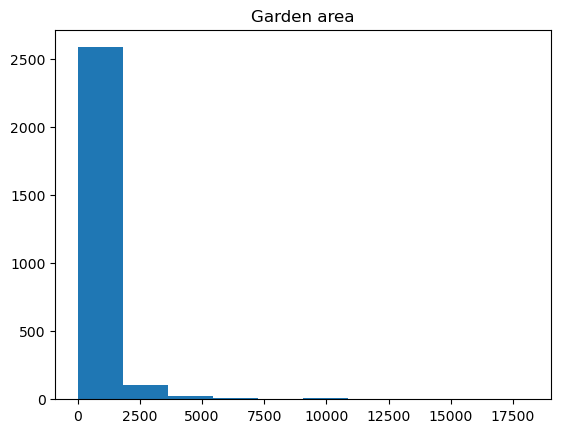

In [ ]:
plt.hist(data['Garden area'])
plt.title('Garden area')
plt.show()

# Drop >= 2500 (93 rows)

In [170]:
data[data['Garden area'] >= 2500]

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
93,20318858,1350,HOUSE,HOUSE,769000.0,residential_sale,5,222.0,1,0.0,...,1,20.0,1,9310.0,9310.0,9592.0,4,0,AS_NEW,single
728,10938778,1180,HOUSE,VILLA,1800000.0,residential_sale,4,219.0,1,0.0,...,1,150.0,1,5000.0,5000.0,5500.0,4,0,TO_RENOVATE,single
766,20148041,4000,HOUSE,VILLA,595000.0,residential_sale,7,455.0,1,-1.0,...,1,28.0,1,3100.0,3100.0,3333.0,4,-1,TO_RENOVATE,single
811,20237920,4900,HOUSE,HOUSE,595000.0,residential_sale,4,214.0,1,0.0,...,1,18.0,1,2908.0,2908.0,3094.0,4,1,GOOD,single
882,20210234,2930,HOUSE,HOUSE,1980000.0,residential_sale,5,689.0,1,-1.0,...,-1,NaN,1,3149.0,3149.0,3149.0,-1,1,GOOD,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14720,20253603,3220,HOUSE,HOUSE,370000.0,residential_sale,5,195.0,1,-1.0,...,1,20.0,1,2500.0,2500.0,3133.0,4,-1,TO_RENOVATE,single
14986,20063113,5380,APARTMENT,APARTMENT,399000.0,residential_sale,3,115.0,-1,-1.0,...,1,55.0,1,6803.0,6803.0,NaN,-1,-1,GOOD,compound
15138,20311635,1400,APARTMENT,APARTMENT,159000.0,residential_sale,2,75.0,1,0.0,...,1,13.0,1,10000.0,10000.0,NaN,4,0,GOOD,single
15335,11211770,3090,HOUSE,VILLA,1195000.0,residential_sale,5,349.0,1,0.0,...,1,130.0,1,5000.0,5000.0,6162.0,4,0,GOOD,single


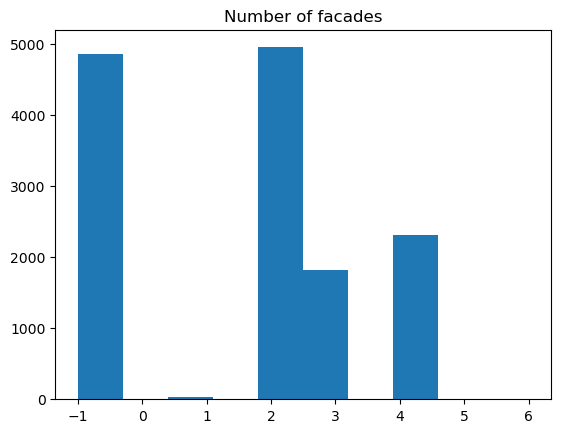

In [ ]:
plt.hist(data['Number of facades'])
plt.title('Number of facades')
plt.show()

# Remove only one (29 rows), and >4 (2 rows) ?

In [145]:
data[data['Number of facades'] > 4] # error? code to 4

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
1655,20157198,1640,HOUSE,VILLA,1250000.0,residential_sale,6,500.0,1,-1.0,...,1,70.0,1,570.0,570.0,1768.0,6,0,AS_NEW,single
11517,20147859,1800,APARTMENT,APARTMENT,397296.0,residential_sale,2,119.0,1,-1.0,...,1,12.0,-1,NaN,NaN,NaN,5,0,AS_NEW,single


In [146]:
data[data['Number of facades'] == 1]

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
647,20312956,4031,APARTMENT,APARTMENT,259000.0,residential_sale,2,99.0,1,-1.0,...,-1,NaN,-1,NaN,NaN,NaN,1,0,AS_NEW,single
776,20319782,2000,HOUSE,APARTMENT_BLOCK,419000.0,residential_sale,3,250.0,1,-1.0,...,-1,NaN,-1,NaN,NaN,59.0,1,0,TO_RESTORE,single
1180,20240468,1180,APARTMENT,APARTMENT,419000.0,residential_sale,1,NaN,-1,-1.0,...,1,1.0,1,1.0,1.0,NaN,1,0,AS_NEW,compound
1665,20180576,1000,APARTMENT,FLAT_STUDIO,240000.0,residential_sale,0,41.0,-1,1.0,...,1,2.0,-1,NaN,NaN,NaN,1,0,AS_NEW,single
2163,20308132,8820,HOUSE,BUNGALOW,239000.0,residential_sale,3,170.0,-1,-1.0,...,-1,NaN,1,630.0,630.0,800.0,1,-1,TO_RENOVATE,single
2530,20215667,1000,APARTMENT,APARTMENT,285000.0,residential_sale,2,80.0,1,-1.0,...,1,NaN,-1,NaN,NaN,NaN,1,0,GOOD,single
2615,20292204,8420,APARTMENT,APARTMENT,380000.0,residential_sale,2,108.0,-1,-1.0,...,1,10.0,-1,NaN,NaN,NaN,1,-1,AS_NEW,single
2627,11273032,8300,APARTMENT,APARTMENT,329900.0,residential_sale,1,38.0,1,1.0,...,1,NaN,-1,NaN,NaN,NaN,1,-1,JUST_RENOVATED,single
2708,20244147,2000,APARTMENT,APARTMENT,419000.0,residential_sale,1,95.0,1,-1.0,...,1,30.0,-1,NaN,NaN,NaN,1,0,GOOD,single
5041,20293509,8380,APARTMENT,APARTMENT,240000.0,residential_sale,1,51.0,1,1.0,...,1,2.0,-1,NaN,NaN,NaN,1,-1,GOOD,single


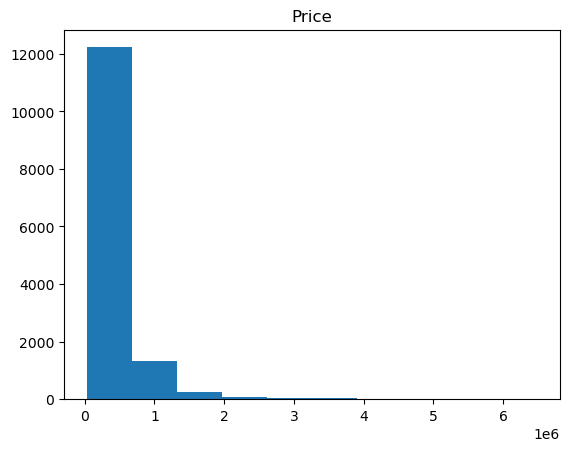

In [ ]:
plt.hist(data['Price'])
plt.title('Price')
plt.show()

# Remove >= 1_000_000 (676 rows)

In [148]:
data[data['Price'] >= 1_000_000] #Duplicate listings, drop one ; and almost all NaN, drop both

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
12,20318961,1310,APARTMENT,APARTMENT,1875000.0,residential_sale,3,260.0,1,0.0,...,1,34.0,-1,NaN,NaN,NaN,3,0,AS_NEW,compound
13,20318942,1310,APARTMENT,APARTMENT,2035000.0,residential_sale,3,293.0,1,0.0,...,1,41.0,-1,NaN,NaN,NaN,-1,0,AS_NEW,compound
142,20316318,8540,HOUSE,VILLA,1195000.0,residential_sale,5,500.0,1,-1.0,...,1,NaN,-1,NaN,NaN,1560.0,4,1,GOOD,single
164,20316000,1040,APARTMENT,PENTHOUSE,1150000.0,residential_sale,3,198.0,-1,-1.0,...,1,42.0,-1,NaN,NaN,NaN,-1,-1,JUST_RENOVATED,single
166,20307949,1150,HOUSE,HOUSE,1195000.0,residential_sale,4,303.0,1,-1.0,...,-1,NaN,1,250.0,250.0,428.0,3,-1,JUST_RENOVATED,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15429,20261577,9630,HOUSE,VILLA,1100000.0,residential_sale,6,561.0,-1,-1.0,...,1,NaN,-1,NaN,NaN,4925.0,-1,-1,GOOD,single
15432,20303201,4870,HOUSE,APARTMENT_BLOCK,1245000.0,residential_sale,12,814.0,1,0.0,...,1,NaN,-1,NaN,NaN,28600.0,4,0,GOOD,single
15459,11446091,9185,HOUSE,MIXED_USE_BUILDING,1299000.0,residential_sale,3,220.0,1,-1.0,...,1,NaN,-1,NaN,NaN,14569.0,-1,-1,GOOD,single
15473,20261655,8300,HOUSE,VILLA,3395000.0,residential_sale,4,244.0,-1,0.0,...,1,NaN,-1,NaN,NaN,593.0,-1,-1,GOOD,single


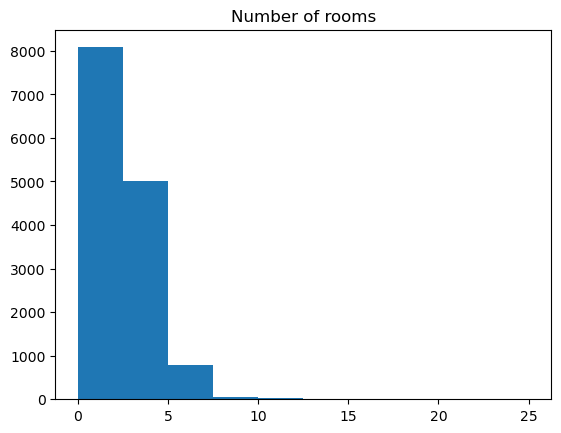

In [ ]:
plt.hist(data['Number of rooms'])
plt.title('Number of rooms')
plt.show()

# remove > 6? (156 rows)

In [150]:
data[data['Number of rooms'] > 6] # single castle, to drop


,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
157,20313806,1030,HOUSE,MIXED_USE_BUILDING,770000.0,residential_sale,7,260.0,-1,0.0,...,-1,NaN,-1,NaN,NaN,110.0,2,0,GOOD,single
355,20192026,6890,HOUSE,VILLA,360000.0,residential_sale,7,226.0,1,-1.0,...,1,NaN,1,500.0,500.0,2066.0,4,-1,TO_BE_DONE_UP,single
364,20316356,2830,HOUSE,VILLA,749000.0,residential_sale,8,384.0,-1,-1.0,...,-1,NaN,-1,NaN,NaN,923.0,4,0,GOOD,single
766,20148041,4000,HOUSE,VILLA,595000.0,residential_sale,7,455.0,1,-1.0,...,1,28.0,1,3100.0,3100.0,3333.0,4,-1,TO_RENOVATE,single
831,20286621,8740,HOUSE,VILLA,1895000.0,residential_sale,8,334.0,-1,-1.0,...,1,NaN,-1,NaN,NaN,18262.0,4,-1,GOOD,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15294,20122032,3020,HOUSE,MANSION,825000.0,residential_sale,11,669.0,1,-1.0,...,1,NaN,-1,NaN,NaN,799.0,2,-1,TO_BE_DONE_UP,single
15297,20304356,1473,HOUSE,EXCEPTIONAL_PROPERTY,950000.0,residential_sale,7,382.0,-1,-1.0,...,-1,NaN,-1,NaN,NaN,15400.0,4,1,TO_BE_DONE_UP,single
15331,11419026,6800,HOUSE,HOUSE,339000.0,residential_sale,8,120.0,1,1.0,...,1,40.0,1,630.0,630.0,770.0,3,0,GOOD,single
15432,20303201,4870,HOUSE,APARTMENT_BLOCK,1245000.0,residential_sale,12,814.0,1,0.0,...,1,NaN,-1,NaN,NaN,28600.0,4,0,GOOD,single


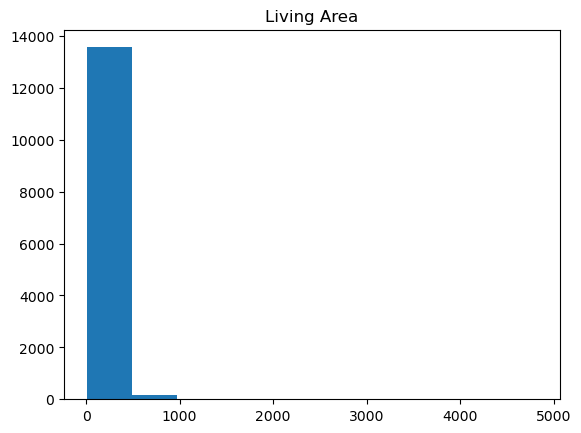

In [ ]:
plt.hist(data['Living Area'])
plt.title('Living Area')
plt.show()

# Remove >= 500 (183 rows)

In [152]:
data[data['Living Area'] >= 500] # A farmhouse

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
142,20316318,8540,HOUSE,VILLA,1195000.0,residential_sale,5,500.0,1,-1.0,...,1,NaN,-1,NaN,NaN,1560.0,4,1,GOOD,single
306,20263033,1050,HOUSE,HOUSE,1995000.0,residential_sale,4,544.0,1,0.0,...,1,90.0,1,250.0,250.0,666.0,2,0,AS_NEW,single
643,20314356,1000,HOUSE,APARTMENT_BLOCK,675000.0,residential_sale,0,1042.0,-1,0.0,...,-1,NaN,-1,NaN,NaN,971.0,2,0,NaN,single
661,20292008,8420,HOUSE,HOUSE,645000.0,residential_sale,4,568.0,-1,-1.0,...,-1,NaN,-1,NaN,NaN,2263.0,-1,-1,GOOD,single
717,20310041,2860,HOUSE,VILLA,1490000.0,residential_sale,5,564.0,1,-1.0,...,1,NaN,-1,NaN,NaN,1610.0,4,1,AS_NEW,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15262,20264615,1050,HOUSE,HOUSE,1995000.0,residential_sale,4,544.0,1,0.0,...,1,NaN,1,230.0,230.0,405.0,2,-1,AS_NEW,single
15294,20122032,3020,HOUSE,MANSION,825000.0,residential_sale,11,669.0,1,-1.0,...,1,NaN,-1,NaN,NaN,799.0,2,-1,TO_BE_DONE_UP,single
15367,20272126,2950,HOUSE,VILLA,2300000.0,residential_sale,5,627.0,1,0.0,...,1,NaN,-1,NaN,NaN,4022.0,4,1,AS_NEW,single
15429,20261577,9630,HOUSE,VILLA,1100000.0,residential_sale,6,561.0,-1,-1.0,...,1,NaN,-1,NaN,NaN,4925.0,-1,-1,GOOD,single


In [10]:
data.groupby("Type of property").count()

,id,Locality,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,Fireplace,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
Type of property,,,,,,,,,,,,,,,,,,,,
APARTMENT,10694,10694,10694,10694,10694,10694,10529,7328,5016,10694,8623,7329,795,795,795,0,6237,3808,7432,10694
HOUSE,4822,4822,4822,4822,4822,4822,4766,3585,2266,4822,3378,1880,2187,2187,2187,4822,3874,2007,4473,4822
